### Nitansh Gupta
#### Group 3.7 (Individual Sumission)

In [1]:
# Libraries and Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import NearestNeighbors
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Importing Data

bikedata = pd.read_csv('C:\\Users\\nitan\\Desktop\\Bike-Sharing-Dataset\\hour.csv')

In [15]:
print(bikedata.shape) #data shape
print(bikedata.dtypes) #data types
bikedata.head() #Data samples

(17379, 17)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
#Renaming Columns for clear understanding:

bikedata.rename(columns={'instant':'instance_id',
                        'dteday':'rental_date',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'casual':'casual_rentals',
                        'registered':'registered_rentals',
                        'cnt':'total_rentals',
                        'hr':'hour',
                        'yr':'year',
                        'atemp':'temp_feel'
                        },inplace=True)

In [19]:
# Categorical Variables type change:

bikedata['season'] = bikedata.season.astype('category')
bikedata['is_holiday'] = bikedata.is_holiday.astype('category')
bikedata['weekday'] = bikedata.weekday.astype('category')
bikedata['weather_condition'] = bikedata.weather_condition.astype('category')
bikedata['is_workingday'] = bikedata.is_workingday.astype('category')
bikedata['month'] = bikedata.month.astype('category')
bikedata['year'] = bikedata.year.astype('category')
bikedata['hour'] = bikedata.hour.astype('category')

# Date time conversion:

bikedata['rental_date'] = pd.to_datetime(bikedata.rental_date)
bikedata.dtypes

instance_id                    int64
rental_date           datetime64[ns]
season                      category
year                        category
month                       category
hour                        category
is_holiday                  category
weekday                     category
is_workingday               category
weather_condition           category
temp                         float64
temp_feel                    float64
humidity                     float64
windspeed                    float64
casual_rentals                 int64
registered_rentals             int64
total_rentals                  int64
dtype: object

In [16]:
bikedata.describe()

,instance_id,temp,temp_feel,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


[Text(0, 0.5, 'humidity'), Text(0.5, 1.0, 'humidity')]

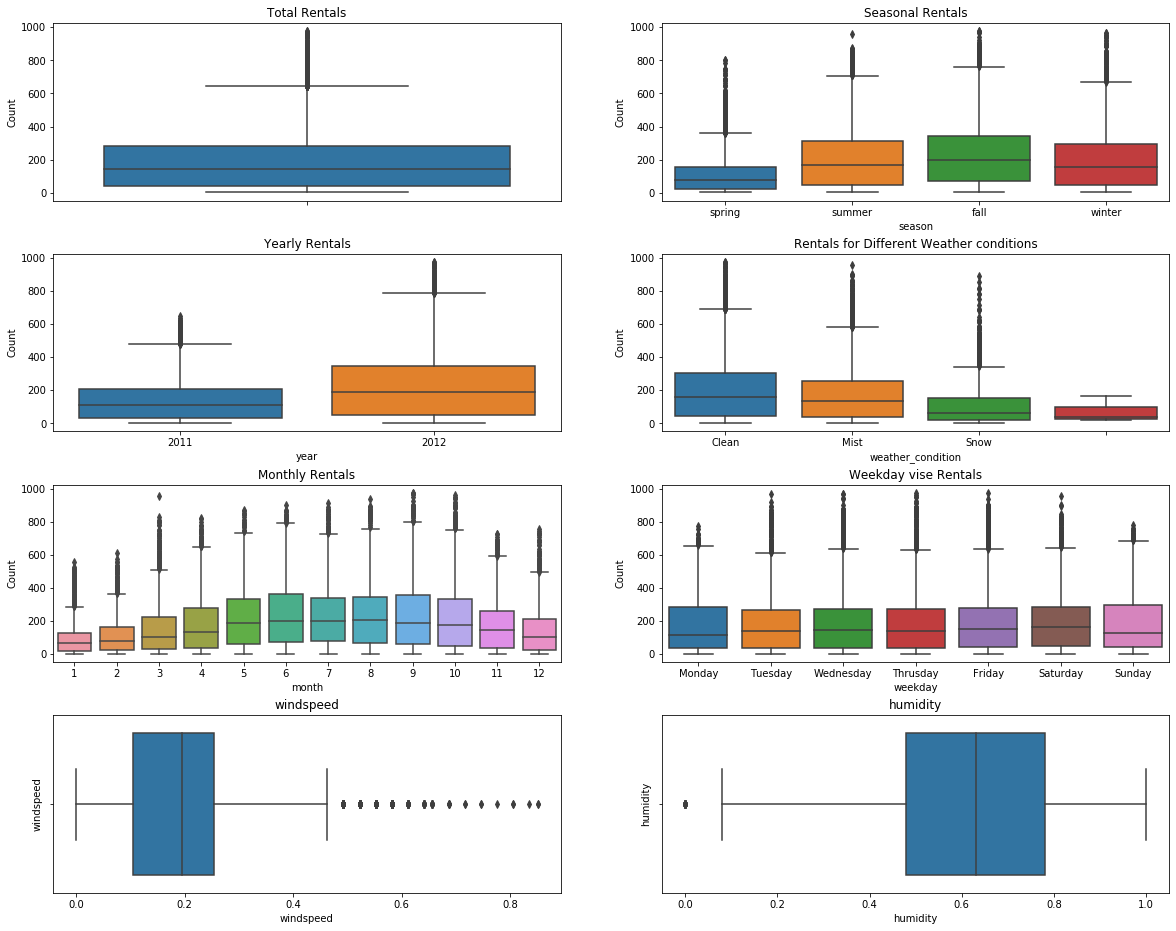

In [17]:
# Alanysing Data Distribution
# Outlier Analysis
fig, axes = plt.subplots(nrows=4,ncols=2) # 4 row 2 column subplots
fig.set_size_inches(20, 16) # set figure size
plt.subplots_adjust(hspace=0.3) # set hspace to avoid overlapping

# boxplots for categorical and continuous features
sns.boxplot(data=bikedata,y="total_rentals", ax=axes[0][0])
sns.boxplot(data=bikedata,y="total_rentals",x="season", ax=axes[0][1])
sns.boxplot(data=bikedata,y="total_rentals",x="year", ax=axes[1][0])
sns.boxplot(data=bikedata,y="total_rentals",x="weather_condition", ax=axes[1][1])
sns.boxplot(data=bikedata,y="total_rentals",x="month", ax=axes[2][0])
sns.boxplot(data=bikedata,y="total_rentals",x="weekday", ax=axes[2][1])
sns.boxplot(data=bikedata,x="windspeed", ax=axes[3][0])
sns.boxplot(data=bikedata,x="humidity", ax=axes[3][1])


axes[0][0].set(ylabel='Count',title="Total Rentals")
axes[0][1].set(ylabel='Count',title="Seasonal Rentals")
axes[0][1].set_xticklabels(['spring','summer','fall','winter'])

axes[1][0].set(ylabel='Count',title="Yearly Rentals")
axes[1][0].set_xticklabels(['2011','2012'])

axes[1][1].set(ylabel='Count',title="Rentals for Different Weather conditions")
axes[1][1].set_xticklabels(['Clean','Mist','Snow'])

axes[2][0].set(ylabel='Count',title="Monthly Rentals")
axes[2][1].set(ylabel='Count',title="Weekday vise Rentals")
axes[2][1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday'])

axes[3][0].set(ylabel='windspeed',title="windspeed")
axes[3][1].set(ylabel='humidity',title="humidity")


In [20]:
#Removing Outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_in = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_in
bikedata=remove_outlier(bikedata, 'total_rentals')
bikedata=remove_outlier(bikedata, 'windspeed')
bikedata=remove_outlier(bikedata, 'humidity')
print(bikedata.shape)

(16522, 17)


##### EDA: Time Trends

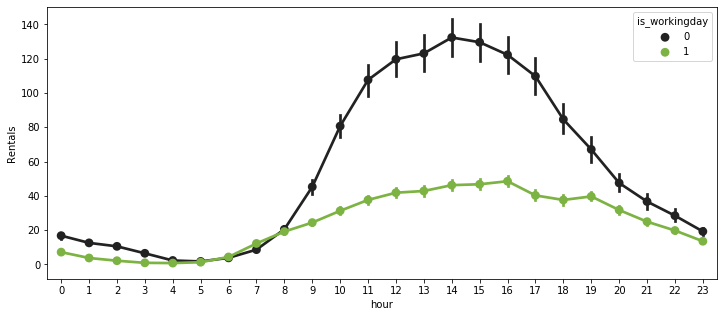

In [80]:
#Hourly trend
plt.figure(figsize = (12,5))

g = sns.pointplot(x = 'hour', y = 'casual_rentals', data = bikedata, estimator = np.average,color = '#7CB342', label = 'casual_rentals', legend_out = True, hue = "is_workingday")
plt.ylabel('Rentals')
plt.show()

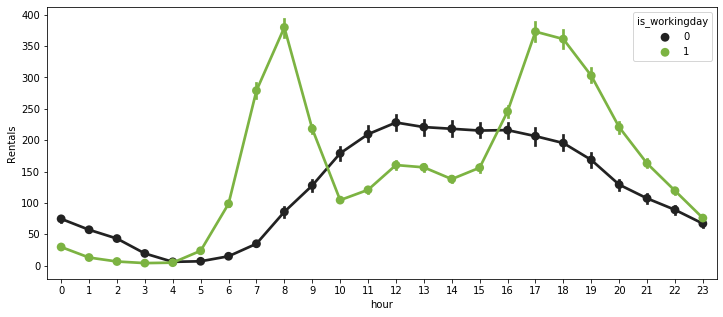

In [81]:
#Hourly trend
plt.figure(figsize = (12,5))
g = sns.pointplot(x = 'hour', y = 'registered_rentals', data = bikedata, estimator = np.average, color = '#7CB342', label = 'registered_rentals', legend_out = True, hue = "is_workingday")
plt.ylabel('Rentals')
plt.show()

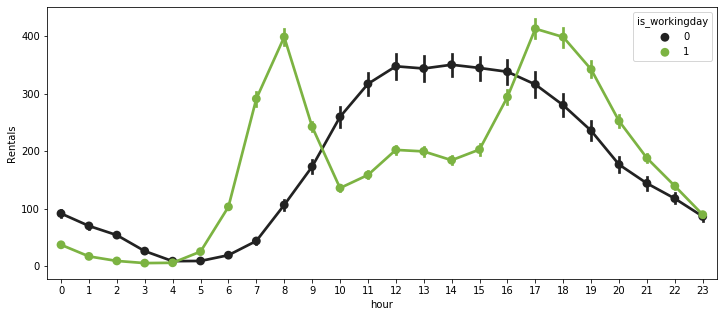

In [82]:
#Hourly trend
plt.figure(figsize = (12,5))

g = sns.pointplot(x = 'hour', y = 'total_rentals', data = bikedata, estimator = np.average, color = '#7CB342', label = 'total_rentals', legend_out = True, hue = "is_workingday")
plt.ylabel('Rentals')
plt.show()

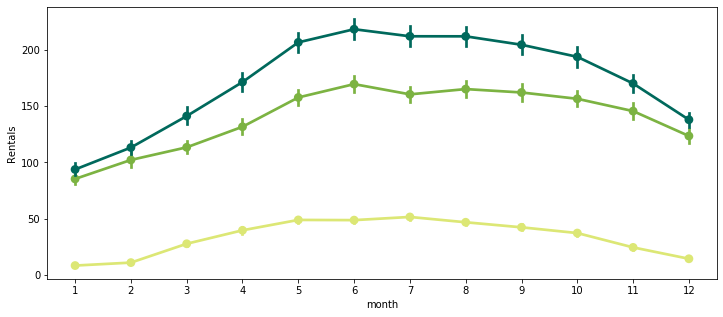

In [72]:
#Hourly trend
plt.figure(figsize = (12,5))

g = sns.pointplot(x = 'month', y = 'casual_rentals', data = bikedata, estimator = np.average, color = '#DCE775', label = 'casual_rentals', legend_out = True)
g = sns.pointplot(x = 'month', y = 'registered_rentals', data = bikedata, estimator = np.average, color = '#7CB342', label = 'registered_rentals', legend_out = True)
g = sns.pointplot(x = 'month', y = 'total_rentals', data = bikedata, estimator = np.average, color = '#00695C', label = 'total_rentals', legend_out = True)
plt.ylabel('Rentals')
plt.show()

##### EDA: seasonality

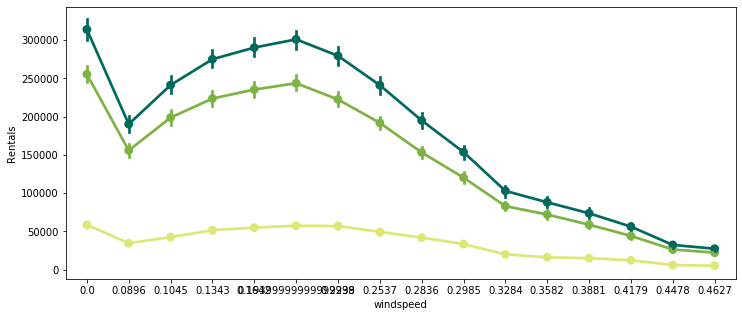

In [85]:
# WindSpeed vs Rentals - Sum 
plt.figure(figsize = (12,5))

g = sns.pointplot(x = 'windspeed', y = 'casual_rentals', data = bikedata, estimator = np.sum, color = '#DCE775', label = 'casual_rentals', legend_out = True)
g = sns.pointplot(x = 'windspeed', y = 'registered_rentals', data = bikedata, estimator = np.sum, color = '#7CB342', label = 'registered_rentals', legend_out = True)
g = sns.pointplot(x = 'windspeed', y = 'total_rentals', data = bikedata, estimator = np.sum, color = '#00695C', label = 'total_rentals', legend_out = True)
plt.ylabel('Rentals')
plt.show()

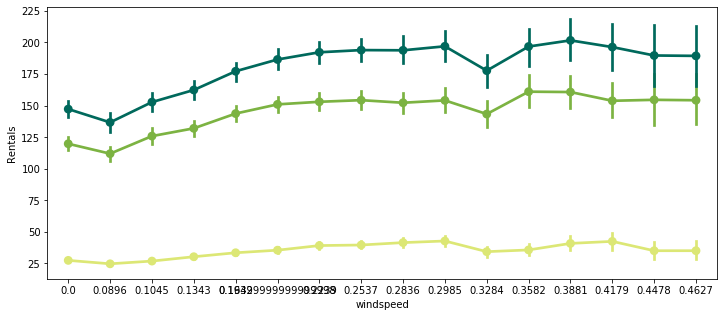

In [87]:
# WindSpeed vs Rentals - Mean
plt.figure(figsize = (12,5))

g = sns.pointplot(x = 'windspeed', y = 'casual_rentals', data = bikedata, estimator = np.average, color = '#DCE775', label = 'casual_rentals', legend_out = True)
g = sns.pointplot(x = 'windspeed', y = 'registered_rentals', data = bikedata, estimator = np.average, color = '#7CB342', label = 'registered_rentals', legend_out = True)
g = sns.pointplot(x = 'windspeed', y = 'total_rentals', data = bikedata, estimator = np.average, color = '#00695C', label = 'total_rentals', legend_out = True)
plt.ylabel('Rentals')
plt.show()

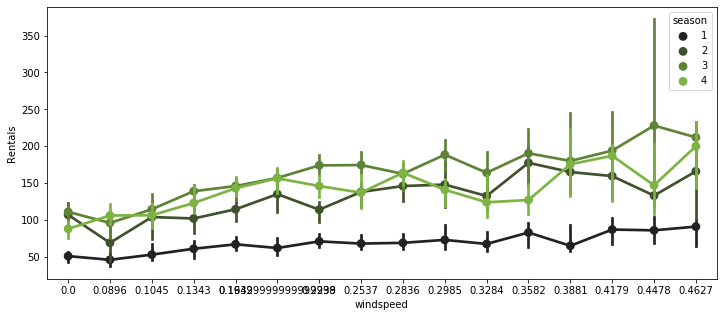

In [126]:
# WindSpeed vs Rentals - Registeres - Median
plt.figure(figsize = (12,5))

g = sns.pointplot(x = 'windspeed', y = 'registered_rentals', data = bikedata, estimator = np.median, color = '#7CB342', label = 'registered_rentals', legend_out = True, hue= 'season')
plt.ylabel('Rentals')
plt.show()

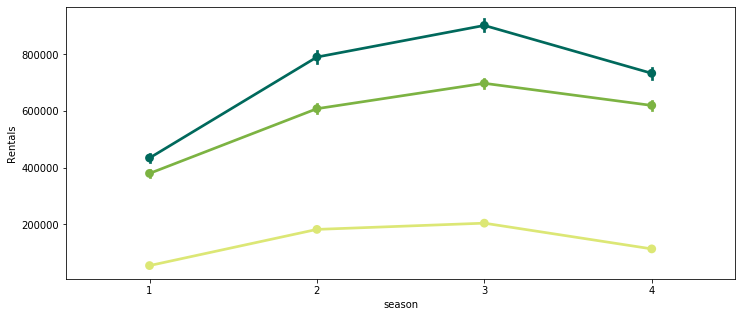

In [125]:
#seasonal
plt.figure(figsize = (12,5))

g = sns.pointplot(x = 'season', y = 'casual_rentals', data = bikedata, estimator = np.sum, color = '#DCE775', label = 'casual_rentals', legend_out = True)
g = sns.pointplot(x = 'season', y = 'registered_rentals', data = bikedata, estimator = np.sum, color = '#7CB342', label = 'registered_rentals', legend_out = True)
g = sns.pointplot(x = 'season', y = 'total_rentals', data = bikedata, estimator = np.sum, color = '#00695C', label = 'total_rentals', legend_out = True)
plt.ylabel('Rentals')
plt.show()

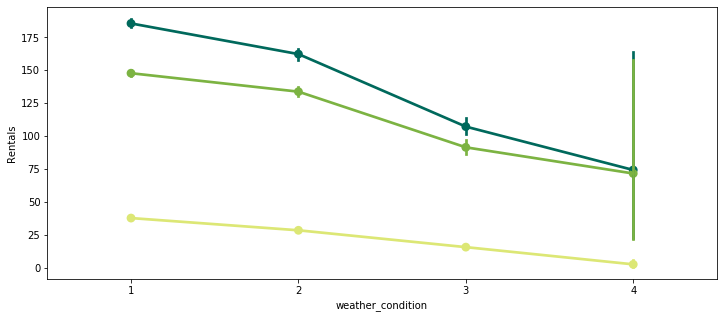

In [132]:
#Weather
plt.figure(figsize = (12,5))

g = sns.pointplot(x = 'weather_condition', y = 'casual_rentals', data = bikedata, estimator = np.average, color = '#DCE775', label = 'casual_rentals', legend_out = True)
g = sns.pointplot(x = 'weather_condition', y = 'total_rentals', data = bikedata, estimator = np.average, color = '#00695C', label = 'total_rentals', legend_out = True)
g = sns.pointplot(x = 'weather_condition', y = 'registered_rentals', data = bikedata, estimator = np.average, color = '#7CB342', label = 'registered_rentals', legend_out = True)
plt.ylabel('Rentals')
plt.show()

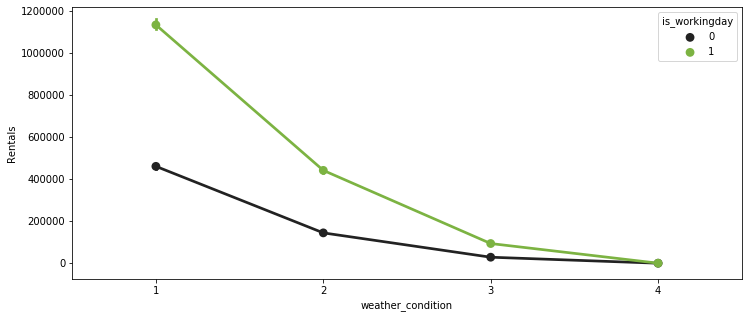

In [128]:
#Weather - registered - is_workingday
plt.figure(figsize = (12,5))
g = sns.pointplot(x = 'weather_condition', y = 'registered_rentals', data = bikedata, estimator = np.average, color = '#7CB342', label = 'registered_rentals', legend_out = True, hue = 'is_workingday')
plt.ylabel('Rentals')
plt.show()

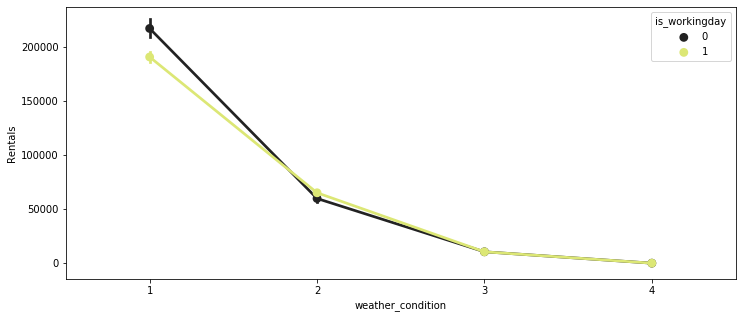

In [129]:
#Weather - casual - Is_workingday
plt.figure(figsize = (12,5))

g = sns.pointplot(x = 'weather_condition', y = 'casual_rentals', data = bikedata, estimator = np.sum, color = '#DCE775', label = 'casual_rentals',hue = "is_workingday", legend_out = True)
plt.ylabel('Rentals')
plt.show()

In [133]:
#Correlation matrix
corr = bikedata.corr()
corr.style.background_gradient(cmap='coolwarm')

,instance_id,temp,temp_feel,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
instance_id,1,0.118635,0.120389,0.0142912,-0.0734779,0.125453,0.228985,0.223319
temp,0.118635,1,0.988454,-0.0660389,-0.0112484,0.462452,0.323255,0.399863
temp_feel,0.120389,0.988454,1,-0.0498397,-0.0497124,0.456303,0.321468,0.396587
humidity,0.0142912,-0.0660389,-0.0498397,1,-0.271258,-0.344293,-0.290944,-0.338566
windspeed,-0.0734779,-0.0112484,-0.0497124,-0.271258,1,0.101616,0.103371,0.11415
casual_rentals,0.125453,0.462452,0.456303,-0.344293,0.101616,1,0.521623,0.720482
registered_rentals,0.228985,0.323255,0.321468,-0.290944,0.103371,0.521623,1,0.967475
total_rentals,0.223319,0.399863,0.396587,-0.338566,0.11415,0.720482,0.967475,1


In [8]:
#Final List of features:
categorical_features = ["season","is_holiday","weather_condition","month","year",'is_workingday','weekday','hour']
continous_features = ["temp","humidity","windspeed"]
dropFeatures1 = ['instance_id',"rental_date","temp_feel",'casual_rentals','total_rentals']
target1=["registered_rentals"]
dropFeatures2 = ['instance_id',"rental_date","temp_feel",'registered_rentals','total_rentals']
target2=["casual_rentals"]
#dropping features
data2 = bikedata.drop(dropFeatures1, axis=1)
data3 = bikedata.drop(dropFeatures2, axis=1)

In [9]:
# Creating Dummy Variables
def get_dummy(df, col):
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1) 
    df = df.drop([col], axis = 1)                                                      
    return df                                                                          

# features to create dummy
get_dummy_features = categorical_features

# create dummy for features
for col in get_dummy_features:
    data2 = get_dummy(data2, col) # create dummy for all categorical features
    data3 = get_dummy(data3, col)


In [136]:
data2.head(5)

,temp,humidity,windspeed,registered_rentals,season_2,season_3,season_4,is_holiday_1,weather_condition_2,weather_condition_3,...,hour_21,hour_22,hour_23,is_workingday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.24,0.81,0.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.22,0.80,0.0,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.22,0.80,0.0,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.24,0.75,0.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.24,0.75,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [137]:
data3.head(5)

,temp,humidity,windspeed,casual_rentals,season_2,season_3,season_4,is_holiday_1,weather_condition_2,weather_condition_3,...,hour_21,hour_22,hour_23,is_workingday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.24,0.81,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.22,0.80,0.0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.22,0.80,0.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.24,0.75,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.24,0.75,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
#splitting data into X and y
y1 = data2['registered_rentals']
X1 = data2.drop(['registered_rentals'], axis = 1)
y2 = data3['casual_rentals']
X2 = data3.drop(['casual_rentals'], axis = 1)

In [11]:
#Test and Train split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, random_state = 0)
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, random_state = 0)
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.fit_transform(X2_test)

In [12]:
# Linear Regression with cross validation - registered
from sklearn.model_selection import cross_val_score
lreg = LinearRegression()
scores = cross_val_score(lreg, X1_train, y1_train)
print("Cross-validation scores: {}".format(scores))
scores = cross_val_score(lreg, X1_test, y1_test)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.80700431 0.82261813 0.83957985]
Cross-validation scores: [0.89823039 0.84044743 0.75931178]


In [13]:
# Linear Regression with cross validation - casual
from sklearn.model_selection import cross_val_score
lreg = LinearRegression()
scores = cross_val_score(lreg, X2_train, y2_train)
print("Cross-validation scores: {}".format(scores))
scores = cross_val_score(lreg, X2_test, y2_test)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.6537466  0.6890186  0.71331464]
Cross-validation scores: [0.74141212 0.73135898 0.71473894]


In [162]:
# Ridge Regression with CrossValidation and GridSeach - Registered
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list1 = []
test_score_list1 = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X1_train,y1_train)
    train_score_list1.append(ridge.score(X1_train,y1_train))
    test_score_list1.append(ridge.score(X1_test, y1_test))
    
print('Training Accuracies for ridge regression:',train_score_list1)
print('Test Accuracy for Ridge regression:',test_score_list1)

Training Accuracies for ridge regression: [0.8430340008392895, 0.8430338774163216, 0.8430225971118003, 0.842358067280446, 0.819718726702742]
Test Accuracy for Ridge regression: [0.8664592473460093, 0.8664590409651136, 0.8664276121994953, 0.8646800663458979, 0.828497314458019]


In [163]:
# Ridge Regression with CrossValidation and GridSeach - casual
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list1 = []
test_score_list1 = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X2_train,y2_train)
    train_score_list1.append(ridge.score(X2_train,y2_train))
    test_score_list1.append(ridge.score(X2_test, y2_test))
    
print('Training Accuracies for ridge regression:',train_score_list1)
print('Test Accuracy for Ridge regression:',test_score_list1)

Training Accuracies for ridge regression: [0.7399796766407378, 0.7399796237229992, 0.7399744916220538, 0.7395691821975767, 0.7238568666466875]
Test Accuracy for Ridge regression: [0.7311019555564581, 0.7311164960149961, 0.7312562198076314, 0.7320751659848393, 0.7171283095083818]


In [164]:
# lasso Regression with CrossValidation and GridSeach - Registered
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list1 = []
test_score_list1 = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X1_train,y1_train)
    train_score_list1.append(lasso.score(X1_train,y1_train))
    test_score_list1.append(lasso.score(X1_test, y1_test))
    
print('Training Accuracies for lasso regression:',train_score_list1)
print('Test Accuracy for lasso regression:',test_score_list1)

Training Accuracies for lasso regression: [0.8430339981936958, 0.8430336191146321, 0.8429953561013391, 0.8404051793012137, 0.7758542657467193]
Test Accuracy for lasso regression: [0.8658224582149907, 0.8657694409818598, 0.8651925922193047, 0.8615141290415187, 0.7793457957137682]


In [165]:
# lasso Regression with CrossValidation and GridSeach - casual
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list1 = []
test_score_list1 = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X2_train,y2_train)
    train_score_list1.append(lasso.score(X2_train,y2_train))
    test_score_list1.append(lasso.score(X2_test, y2_test))
    
print('Training Accuracies for lasso regression:',train_score_list1)
print('Test Accuracy for lasso regression:',test_score_list1)

Training Accuracies for lasso regression: [0.7399796157281389, 0.7399735388228481, 0.7398076728727402, 0.7325122171523941, 0.5853316583898194]
Test Accuracy for lasso regression: [0.7320708174924169, 0.7319380012925775, 0.7299355066304608, 0.7143391001353664, 0.5209525076668036]


In [166]:
#Polynomial Regression - registered
from  sklearn.preprocessing  import PolynomialFeatures
x_range = [1,2]
train_score_list3 = []
test_score_list3 = []

for n in x_range:
    poly = PolynomialFeatures(n)
    X1_train_poly = poly.fit_transform(X1_train)
    X1_test_poly = poly.transform(X1_test)
    lreg.fit(X1_train_poly, y1_train)
    train_score_list3.append(lreg.score(X1_train_poly, y1_train))
    test_score_list3.append(lreg.score(X1_test_poly, y1_test))
print(train_score_list3)
print(test_score_list3)

[0.8430340020981045, 0.9571361310824711]
[0.8664592337424784, -4.609751350185972e+23]


In [167]:
#Polynomial Regression - casual
from  sklearn.preprocessing  import PolynomialFeatures
x_range = [1,2]
train_score_list3 = []
test_score_list3 = []

for n in x_range:
    poly = PolynomialFeatures(n)
    X2_train_poly = poly.fit_transform(X2_train)
    X2_test_poly = poly.transform(X2_test)
    lreg.fit(X2_train_poly, y2_train)
    train_score_list3.append(lreg.score(X2_train_poly, y2_train))
    test_score_list3.append(lreg.score(X2_test_poly, y2_test))
print(train_score_list3)
print(test_score_list3)

[0.7399796771769654, 0.9347403167731178]
[0.7311003337439901, -4.200161205535379e+23]


In [168]:
#Linear SVM - Registered

from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
        clf = SVR(kernel = 'linear',gamma = 'scale',C=C)
        scores = cross_val_score(clf, X1_train, y1_train, cv=2)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
clf = SVR(**best_parameters)
clf.fit(X1_test, y1_test)
train_score = clf.score(X1_train, y1_train)
test_score = clf.score(X1_test, y1_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on C-validation set: 0.79
Best parameters:  {'C': 100}
Train set score with best parameters: 0.26
Test set score with best parameters: 0.31


In [169]:
#Linear SVM - Casual

from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
        clf = SVR(kernel = 'linear',gamma = 'scale',C=C)
        scores = cross_val_score(clf, X2_train, y2_train, cv=2)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
clf = SVR(**best_parameters)
clf.fit(X2_test, y2_test)
train_score = clf.score(X2_train, y2_train)
test_score = clf.score(X2_test, y2_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on C-validation set: 0.67
Best parameters:  {'C': 100}
Train set score with best parameters: 0.44
Test set score with best parameters: 0.50


In [170]:
# RBF SVM - Registered
from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
    for gamma in [0.01, 0.1,1, 10, 100]:
        clf = SVR(kernel = 'rbf',gamma = gamma,C=C)
        scores = cross_val_score(clf, X1_train, y1_train, cv=2)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
clf = SVR(**best_parameters)
clf.fit(X1_test, y1_test)
train_score = clf.score(X1_train, y1_train)
test_score = clf.score(X1_test, y1_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on C-validation set: 0.32
Best parameters:  {'C': 100, 'gamma': 0.01}
Train set score with best parameters: 0.24
Test set score with best parameters: 0.26


In [171]:
#### RBF Casual
from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
    for gamma in [0.01, 0.1,1, 10, 100]:
        clf = SVR(kernel = 'rbf',gamma = gamma,C=C)
        scores = cross_val_score(clf, X2_train, y2_train, cv=2)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
clf = SVR(**best_parameters)
clf.fit(X2_test, y2_test)
train_score = clf.score(X2_train, y2_train)
test_score = clf.score(X2_test, y2_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on C-validation set: 0.46
Best parameters:  {'C': 100, 'gamma': 0.01}
Train set score with best parameters: 0.43
Test set score with best parameters: 0.45


In [172]:
#### Poly SVM - Registered
from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
    for epsilon in [0.01, 0.1, 1, 10, 100]:
        clf = SVR(kernel = 'poly',gamma ='scale', epsilon = epsilon,C=C)
        scores = cross_val_score(clf, X1_train, y1_train, cv=2)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'epsilon': epsilon}
clf = SVR(**best_parameters)
clf.fit(X1_test, y1_test)
test_score = clf.score(X1_train, y1_train)
test_score = clf.score(X1_test, y1_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.5f}".format(train_score))
print("Test set score with best parameters: {:.5f}".format(test_score))


Best score on C-validation set: 0.21
Best parameters:  {'C': 100, 'epsilon': 0.01}
Train set score with best parameters: 0.43027
Test set score with best parameters: 0.31261


In [173]:
#### Poly SVM - Casual
from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
    for epsilon in [0.01, 0.1, 1, 10, 100]:
        clf = SVR(kernel = 'poly',gamma ='scale', epsilon = epsilon,C=C)
        scores = cross_val_score(clf, X2_train, y2_train, cv=2)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'epsilon': epsilon}
clf = SVR(**best_parameters)
clf.fit(X2_test, y2_test)
test_score = clf.score(X2_train, y2_train)
test_score = clf.score(X2_test, y2_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.5f}".format(train_score))
print("Test set score with best parameters: {:.5f}".format(test_score))

Best score on C-validation set: 0.31
Best parameters:  {'C': 100, 'epsilon': 0.01}
Train set score with best parameters: 0.43027
Test set score with best parameters: 0.50353
